In [1]:
import gym # para elegir el ambiente en el cual entrenaremos el agente.
import sys

import pandas as pd # para disponer de la data de forma mas organizada.
import matplotlib.pyplot as plt # para mostrar gráficos.
import numpy as np #para el procesamiento de números.

np.random.seed(666)

%matplotlib inline

from collections import defaultdict #utilizaremos un defaultdict como base
# en la cual guardaremos el valor que tendrá cada una de nuestras acciones.
from utils import e_greedy

In [2]:
env = gym.make('FrozenLake-v0') #este es el ambiente que utilizaremos,
# puedes buscar como funciona en la documentación.

In [3]:
numero_de_acciones = env.action_space.n
Q = defaultdict(lambda: np.zeros(numero_de_acciones)) #se define nuestra base como un diccionario anidado con cada acción 
#que podría tomar el agente.
decay = 0.0000042
decay = 1 - decay #este valor será por el cual decaerá nuestro epsilon en cada episodio. 
alpha = 0.0005 #nuestro valor de "media movil" se verá afectado por esta variable. 
lambd = 0.9 #variable lambda de TD(lambda).
gamma = 0.95 #variable por la cual verá reducido la elegibilidad de cada estado.


episode = 0
total_reward = 0
eps = epsilon = 1 # valor de epsilon inicial
eps_list = list() #variable que almacenará los valores de epsilon.
reward_list = [] #variable que almacenará los valores de recompensa.

In [4]:
for numb_iter in range(1, 1200001):
    estado_anterior = env.reset()
    epsilon= eps*decay**episode  
    reward_list.append(total_reward)
    total_reward = 0
    episode += 1
    actions_prob = e_greedy(Q, epsilon, numero_de_acciones, estado_anterior) #variable que almacenará la probabilidad de realizar cada acción. 
    selected_next_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción.
    counter_state_actions = set() #esta variable almacenará cada que accion se realice por cada episodio.
    elegibilidad = defaultdict(lambda: np.zeros(numero_de_acciones)) 
    while True:   
        for ob, ac in counter_state_actions:
            elegibilidad[ob][ac]  *= lambd* gamma 
        elegibilidad[estado_anterior][selected_next_action] += 1.0
        obs, temporal_reward, final, _ = env.step(selected_next_action)
        counter_state_actions.add((estado_anterior, selected_next_action))
        selected_action = selected_next_action
        actions_prob = e_greedy(Q, epsilon, numero_de_acciones, obs) #variable que almacenará la probabilidad de realizar cada acción. 
        selected_next_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción.   
        td_error = temporal_reward + gamma * Q[obs][selected_next_action] - Q[estado_anterior][selected_action]
        estado_anterior = obs
        for ob, ac in counter_state_actions:
            Q[ob][ac] += alpha * td_error * elegibilidad[ob][ac]
        total_reward += temporal_reward
        if final:
            if episode % 100000 == 0:
                print(f'Número de Episodios Realizados: {episode}')           
            eps_list.append(epsilon)
            break

Número de Episodios Realizados: 100000
Número de Episodios Realizados: 200000
Número de Episodios Realizados: 300000
Número de Episodios Realizados: 400000
Número de Episodios Realizados: 500000
Número de Episodios Realizados: 600000
Número de Episodios Realizados: 700000
Número de Episodios Realizados: 800000
Número de Episodios Realizados: 900000
Número de Episodios Realizados: 1000000
Número de Episodios Realizados: 1100000
Número de Episodios Realizados: 1200000


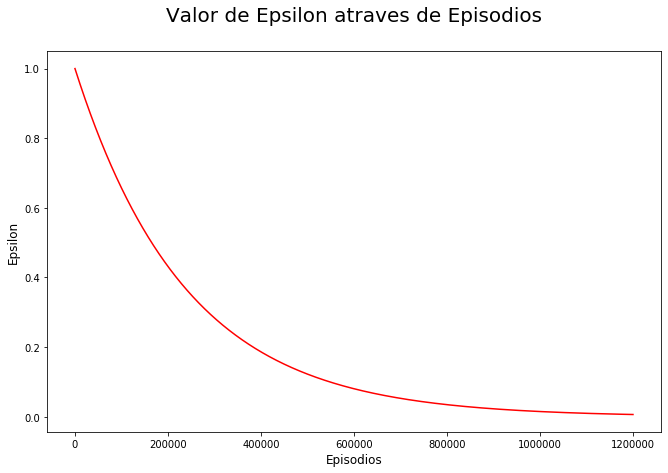

In [5]:
plt.figure(figsize=(11,7)) 
plt.title('Valor de Epsilon atraves de Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)

plt.plot(eps_list, color='r')

In [6]:
df = pd.DataFrame({'Reward': reward_list})

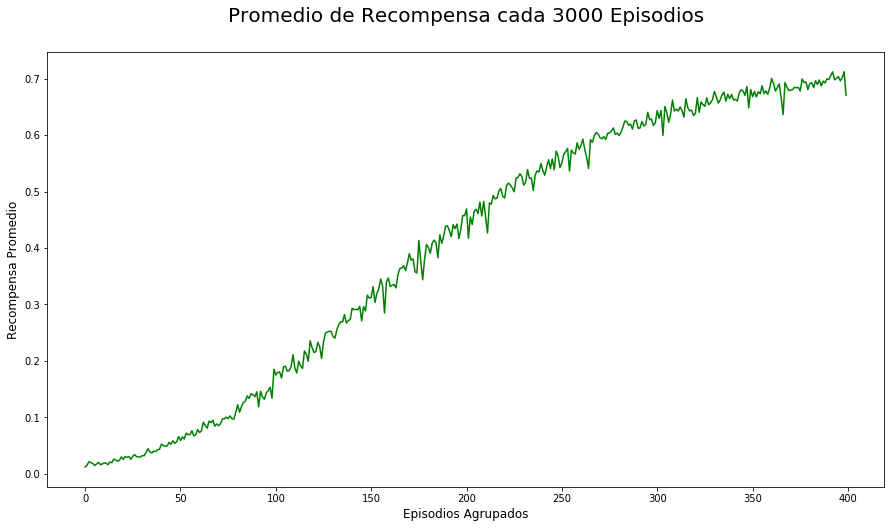

In [7]:
plt.figure(figsize=(15,8)) 
plt.title('Promedio de Recompensa cada 3000 Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios Agrupados', fontsize=12)
plt.ylabel('Recompensa Promedio', fontsize=12)
plt.plot(df.groupby(df.index //3000)['Reward'].mean(), color='g')

In [8]:
Q

defaultdict(<function __main__.<lambda>()>,
            {0: array([0.16911947, 0.15927031, 0.15904724, 0.15788257]),
             1: array([0.08283861, 0.0835878 , 0.0752049 , 0.14443599]),
             2: array([0.14272273, 0.11975627, 0.12212139, 0.1095517 ]),
             3: array([0.03599893, 0.03460327, 0.03104425, 0.12069313]),
             7: array([0., 0., 0., 0.]),
             4: array([0.19961604, 0.146861  , 0.13735949, 0.11580068]),
             5: array([0., 0., 0., 0.]),
             8: array([0.14613402, 0.19663263, 0.17484142, 0.2590819 ]),
             9: array([0.23331969, 0.35538997, 0.27819152, 0.20613792]),
             13: array([0.27212722, 0.38322524, 0.47779065, 0.34444844]),
             10: array([0.39530327, 0.33467312, 0.28006643, 0.16463972]),
             14: array([0.50943489, 0.70944563, 0.68932265, 0.61584093]),
             15: array([0., 0., 0., 0.]),
             6: array([0.1679436 , 0.11415359, 0.1603046 , 0.04110109]),
             11: array([0.